<a href="https://www.kaggle.com/code/avtnshm/ds-ml-jobs-indeed-top10-skills?scriptVersionId=146542170" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [2]:
df1=pd.read_csv("/kaggle/input/data-science-data-analyst-and-ml-jobs-from-indeed/Data Science jobs (Indeed).csv")
print(df1.head())
df2=pd.read_csv("/kaggle/input/data-science-data-analyst-and-ml-jobs-from-indeed/ML Engineer jobs (Indeed).csv")
df2.head()

   Unnamed: 0       job title                      company     region  \
0           0  Data scientist  London Stock Exchange Group  Hyderabad   
1           1  Data scientist                       Indeed     Remote   
2           2  Data scientist                       Indeed     Remote   
3           3  Data scientist              Khan's Tutorial       Pune   
4           4  Data scientist       Onsite Academy Pvt Ltd   Guwahati   

                    skills required is remote? is fresher?  
0                               NaN         No         NaN  
1  Data Structure, Machine Learning        Yes         NaN  
2  Data Structure, Machine Learning        Yes         NaN  
3                            Python         No         NaN  
4          Python, Machine Learning         No         NaN  


,Unnamed: 0,job title,company,region,is remote?,is fresher?,skills required
0,0,ML Engineer,LanceTech Solutions Pvt Ltd,Agra,No,No,Computer Vision
1,1,ML Engineer,LanceTech Solutions Pvt Ltd,Agra,No,No,Computer Vision
2,2,ML Engineer,Google,Bengaluru,No,No,"Deep Learning, Tensorflow"
3,3,ML Engineer,PMAM Corporation,Marol,No,NaN,NaN
4,4,ML Engineer,Mercedes-Benz Research and Development India...,Bengaluru,No,NaN,"Computer Vision, Neural Network"


In [3]:
df1.drop('Unnamed: 0', axis=1, inplace=True)
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
print(df1['is fresher?'].isna().sum()/len(df1['is fresher?']))
df2['is fresher?'].isna().sum()/len(df2['is fresher?'])

0.6523668639053254


0.6296296296296297

In [5]:
df1['is fresher?'].fillna('Unknown', inplace=True)
df2['is fresher?'].fillna('Unknown', inplace=True)

In [6]:
print(df1['company'].nunique())
df2['company'].nunique()

507


142

In [7]:
print(df1.describe(include='all').transpose())
df2.describe(include='all').transpose()

                count unique               top freq
job title         676      1    Data scientist  676
company           676    507         Accenture   14
region            676     68         Bengaluru  209
skills required   263     58  Machine Learning   40
is remote?        676      2                No  591
is fresher?       676      3           Unknown  441


,count,unique,top,freq
job title,162,1,ML Engineer,162
company,162,142,Dell Technologies,3
region,162,38,Bengaluru,47
is remote?,162,2,No,132
is fresher?,162,2,Unknown,102
skills required,104,44,Ai,22


In [8]:
print(df1.info())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job title        676 non-null    object
 1   company          676 non-null    object
 2   region           676 non-null    object
 3   skills required  263 non-null    object
 4   is remote?       676 non-null    object
 5   is fresher?      676 non-null    object
dtypes: object(6)
memory usage: 31.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job title        162 non-null    object
 1   company          162 non-null    object
 2   region           162 non-null    object
 3   is remote?       162 non-null    object
 4   is fresher?      162 non-null    object
 5   skills required  104 non-null    object
dtypes: object(6)
memory u

In [9]:
df1['skills required'].fillna('NA', inplace=True)
df2['skills required'].fillna('NA', inplace=True)

In [10]:
print(df1['is fresher?'].value_counts())
df2['is fresher?'].value_counts()

is fresher?
Unknown    441
No         232
Yes          3
Name: count, dtype: int64


is fresher?
Unknown    102
No          60
Name: count, dtype: int64

In [11]:
import pandas as pd
yes_fresher_df1 = df1[df1['is fresher?'] == 'Yes']
company_names = yes_fresher_df1['company'].tolist()
print(company_names)

['SciPy Technologies', 'ONLEI Technologies', 'Google']


In [12]:
df1.drop(columns=['is fresher?','is remote?'], inplace=True)
df2.drop(columns=['is fresher?','is remote?'], inplace=True)

In [13]:
print(df1.head())
df2.head()

        job title                      company     region  \
0  Data scientist  London Stock Exchange Group  Hyderabad   
1  Data scientist                       Indeed     Remote   
2  Data scientist                       Indeed     Remote   
3  Data scientist              Khan's Tutorial       Pune   
4  Data scientist       Onsite Academy Pvt Ltd   Guwahati   

                    skills required  
0                                NA  
1  Data Structure, Machine Learning  
2  Data Structure, Machine Learning  
3                            Python  
4          Python, Machine Learning  


,job title,company,region,skills required
0,ML Engineer,LanceTech Solutions Pvt Ltd,Agra,Computer Vision
1,ML Engineer,LanceTech Solutions Pvt Ltd,Agra,Computer Vision
2,ML Engineer,Google,Bengaluru,"Deep Learning, Tensorflow"
3,ML Engineer,PMAM Corporation,Marol,NA
4,ML Engineer,Mercedes-Benz Research and Development India...,Bengaluru,"Computer Vision, Neural Network"


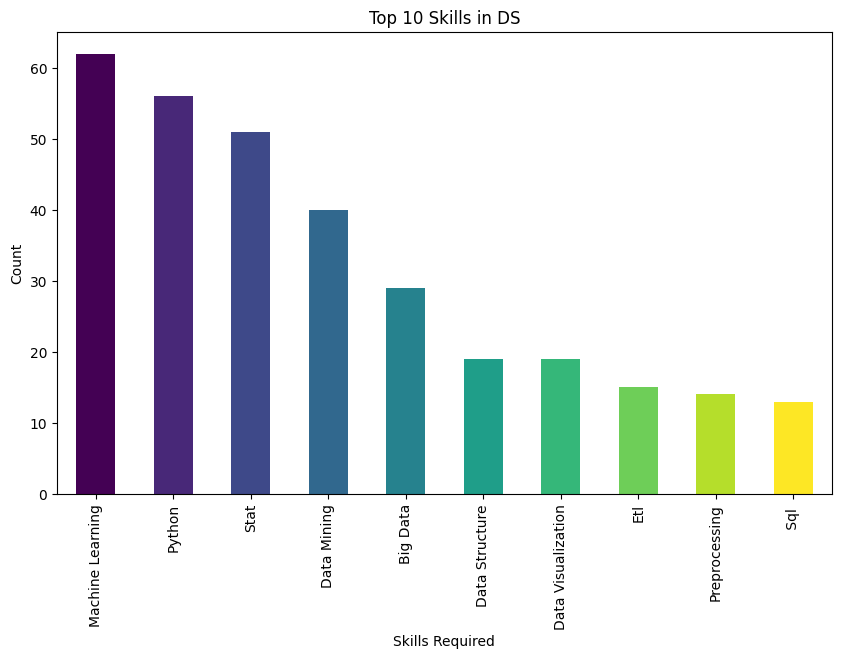

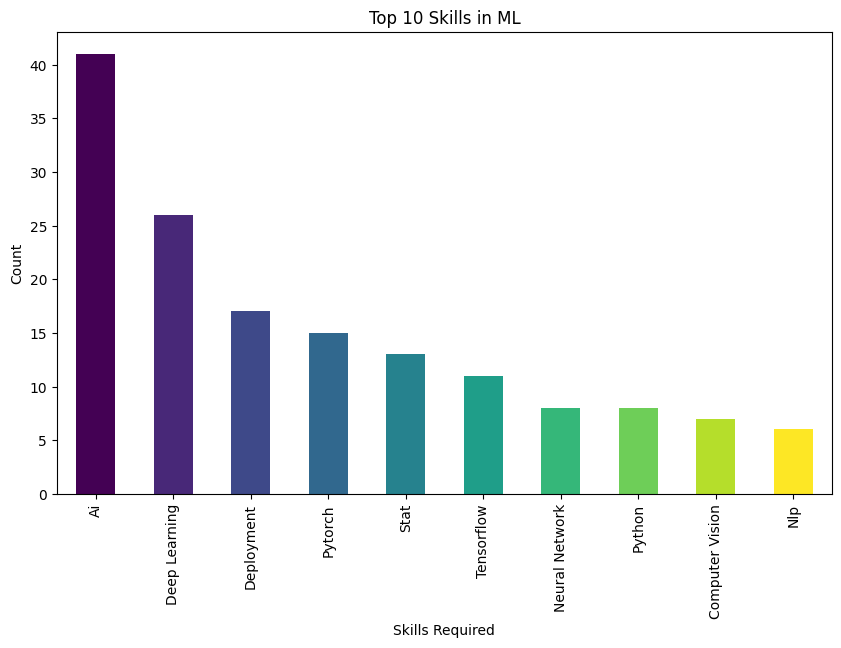

In [14]:
def plot_top_skills_exclude_na(dataframe, title, n):
    # Split the skills required into a list and combine them
    combined_skills = dataframe['skills required'].str.split(', ').explode()

    # Exclude "NA" values and count the occurrence of each skill, then get the top N skills
    top_skills = combined_skills[combined_skills != "NA"].value_counts().nlargest(n)

    # Create a bar chart for the top skills with different colors
    colors = plt.cm.viridis(np.linspace(0, 1, n))
    top_skills.plot(kind='bar', figsize=(10, 6), color=colors)
    
    plt.xlabel('Skills Required')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

# Extract and plot the top 10 skills for both DataFrames, excluding "NA" and using different colors
plot_top_skills_exclude_na(df1, "Top 10 Skills in DS", 10)
plot_top_skills_exclude_na(df2, "Top 10 Skills in ML", 10)
#coded by chatgpt